# 🚀 MLflow for MLOps with PyCaret

## 🔹 What is MLflow?  
MLflow is an **open-source platform** that helps manage the entire **machine learning lifecycle**. It provides tools to:
- Track and log **experiments**
- Organize and version **ML models**
- Deploy models to **production**
- Collaborate with **teams** efficiently

## 📌 Why Use MLflow?  
Traditional ML development often lacks **organization, reproducibility, and tracking**.  
MLflow solves this by offering:
1. **Experiment Tracking** – Log model parameters, metrics, and results.  
2. **Model Registry** – Store and version models for easy access.  
3. **Reproducibility** – Record and retrieve ML pipelines.  
4. **Deployment & Monitoring** – Deploy trained models and monitor performance.

---

#### **🔹Lab Objective**  
In this lab, you will learn how to apply **MLOps principles** using **PyCaret and MLflow** to automate and track machine learning experiments. By the end, you will be able to:  
1. **Set up an MLOps pipeline** using PyCaret and MLflow.  
2. **Train, compare, and select the best machine learning model automatically.**  
3. **Track experiments** using MLflow to log metrics, parameters, and artifacts.  
4. **Deploy a trained model** for real-world usage.  

---

#### **🔹Scenario: Automating Diamond Price Prediction**  
Imagine you are a **data scientist** working for a diamond pricing company. Your job is to build an **ML model to predict diamond prices** based on features like:  
- **Carat weight** (size of the diamond)  
- **Cut quality** (Fair, Good, Very Good, Premium, Ideal)  
- **Color and Clarity** (visual quality factors)  
- **Depth, Table, and other physical properties**  

##### **🔹Challenges:**  
- You need to **test multiple ML models** quickly.  
- You want to **track and log model performance** to compare results.  
- You must **save the best model** for future deployment.  

---

#### **🔹Solution: PyCaret + MLflow**  
We will use **PyCaret** to automate model training and **MLflow** to track our experiments.  

✅ **PyCaret** helps in:  
- Data preprocessing  
- Model selection  
- Hyperparameter tuning  

✅ **MLflow** helps in:  
- Logging metrics and parameters  
- Saving and versioning models  
- Experiment tracking  


#### **🔹Why Use PyCaret and MLflow?**

To efficiently manage machine learning models, we use two powerful tools:  
1. **PyCaret** → Automates model training and selection.  
2. **MLflow** → Helps track and manage ML experiments.  

| Feature                          | PyCaret | MLflow |
|----------------------------------|---------|--------|
| **Automated Model Selection**    | ✅ Yes  | ❌ No  |
| **Hyperparameter Tuning**        | ✅ Yes  | ❌ No  |
| **Experiment Tracking**          | ✅ Limited | ✅ Yes |
| **Model Deployment**             | ✅ Yes  | ✅ Yes |

---

#### **🔹How They Work Together**  
- **PyCaret** trains multiple models **automatically**.  
- **MLflow** **logs each experiment**, so we can compare different models.  
- The best-performing model is **saved and deployed** for future use.  

Using **both PyCaret and MLflow**, we can build **efficient, trackable, and scalable** ML pipelines.  


##### **Step 1: Install Required Libraries**

Before we begin, we need to install some essential Python libraries.  

**Libraries Overview**   
- **PyCaret** → Automates the entire machine learning pipeline.  
- **MLflow** → Used for model tracking and logging.  
- **importlib-metadata** → Helps manage library dependencies.  

**🔽 Run the following code to install them:**


In [ ]:
pip install --upgrade pycaret mlflow


Note: you may need to restart the kernel to use updated packages.


**Restart the Kernel after this step** 🔼
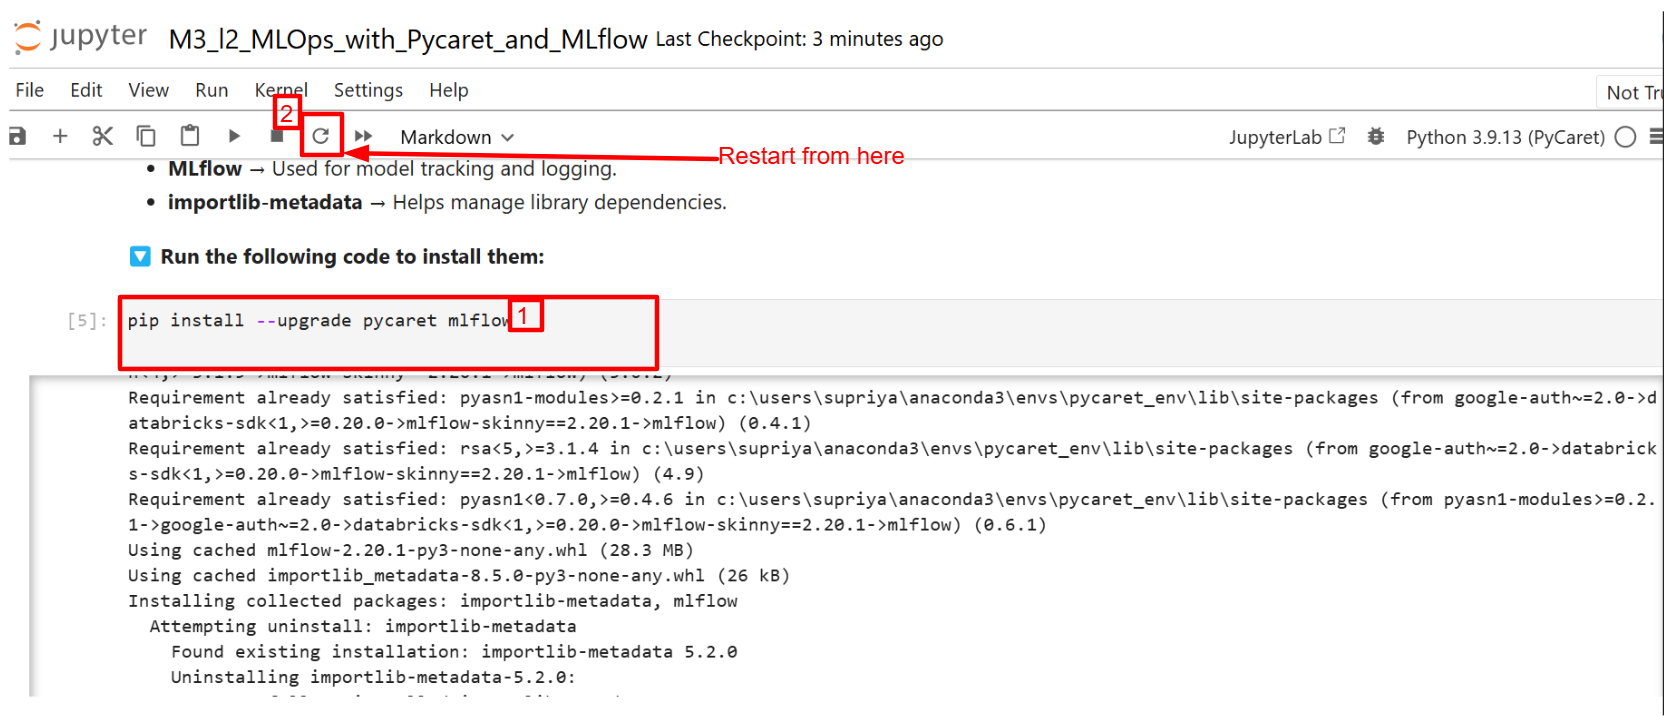

# **Initialize PyCaret for Diamond Price Prediction**  

This Code **loads the "diamond" dataset, handles missing values, and initializes PyCaret for automated machine learning**. It ensures that the target column (`Price`) exists before setting up PyCaret with transformations. Finally, it confirms the setup completion, preparing the dataset for model training and evaluation.  


##### **Step 2: Load and Prepare Data**  

Now that we have installed the required libraries, let's move on to **loading and preparing the dataset**.  

 **🔹 Import necessary functions from PyCaret**


In [ ]:
# Import necessary functions from pycaret
from pycaret.regression import setup, compare_models, plot_model, finalize_model, save_model

##### **Step 3: Load the Dataset**  

Now that we have installed the required libraries, let's load the dataset we will use for model training.  

##### **🔹 Load the 'diamond' dataset**  

In [ ]:
# Load the 'diamond' dataset from PyCaret's built-in datasets
from pycaret.datasets import get_data
data = get_data('diamond')

##### **Step 4: Data Preprocessing and Handling Missing Values**  

Before training our model, we need to **prepare the dataset** by handling missing values and verifying the target column.  

 **🔹 Handle Missing Values**  


In [ ]:
# Ensure no missing values in the dataset for numerical columns
numerical_cols = data.select_dtypes(include='number').columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Ensure that 'Price' column exists and run the setup
if 'Price' not in data.columns:
    raise ValueError("'Price' column not found in the dataset")

##### **Step 5: Initialize PyCaret and Set Up the Experiment**  

Now that our dataset is ready, we will initialize **PyCaret** and configure the experiment.  

**Initialize PyCaret Setup**  


In [ ]:
# Initialize PyCaret setup
experiment_name = 'diamond_experiment_01'
s = setup(data,
          target='Price',
          transform_target=True,
          log_experiment=False,  # Temporarily disable logging
          experiment_name=experiment_name)

# Check if setup was successful
print(f"Experiment '{experiment_name}' setup complete!")

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


,Description,Value
0,Session id,3073
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Numeric features,1
8,Categorical features,6
9,Preprocess,True


Experiment 'diamond_experiment_01' setup complete!


##### **Step 6: Train and Compare Models**  

Now that our experiment is set up, we can **train multiple machine learning models** and compare their performance.  

#### **Compare Different Models**  


In [ ]:
# Now compare models (only after setup completes successfully)
best = compare_models()



,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,733.0732,2139370.2262,1440.3093,0.9806,0.0783,0.0579,0.6760
lightgbm,Light Gradient Boosting Machine,654.7141,2126885.7240,1426.9999,0.9805,0.0679,0.0494,0.3160
rf,Random Forest Regressor,732.1974,2241482.2832,1464.8070,0.9797,0.0773,0.0571,0.5310
gbr,Gradient Boosting Regressor,773.9633,2895420.4529,1658.2494,0.9731,0.0777,0.0576,0.2860
dt,Decision Tree Regressor,920.1227,3474161.5954,1839.3315,0.9685,0.1005,0.0732,0.1060
ada,AdaBoost Regressor,2067.0855,17991573.4799,4203.3031,0.8371,0.1894,0.1546,0.2310
knn,K Neighbors Regressor,3127.2883,37870619.3805,6127.5393,0.6528,0.3659,0.2343,0.1270
omp,Orthogonal Matching Pursuit,3471.3174,96889055.9644,9558.7030,0.0913,0.2884,0.2263,0.1020
llar,Lasso Least Angle Regression,6719.2127,122722128.5755,11063.7587,-0.1279,0.7245,0.5708,0.1120
lasso,Lasso Regression,6719.2127,122722128.5755,11063.7587,-0.1279,0.7245,0.5708,0.1100


##### **Step 7: Evaluate Model Performance with Residuals**  

Once we have selected the best model, we need to **analyze its performance**. One way to do this is by checking the **residuals plot**.  

**🔹 Plot Residuals of the Best Model**  


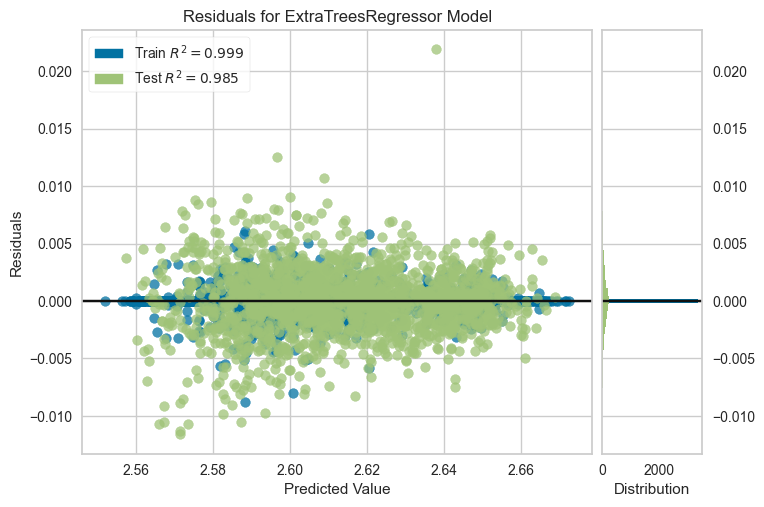

In [ ]:
# check the residuals of trained model
plot_model(best, plot = 'residuals')

##### **Step 8: Analyze Feature Importance**  

Understanding which features have the most impact on predictions is crucial. We can visualize **feature importance** to see which variables influence the model's decisions the most.  

 **🔹 Plot Feature Importance**  

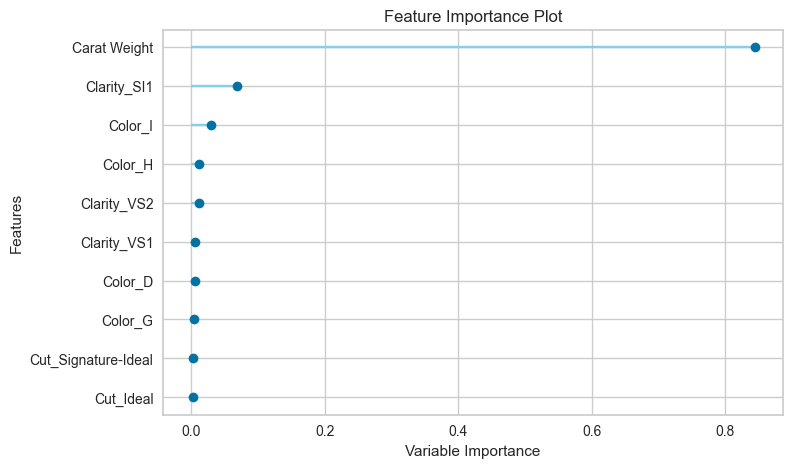

In [ ]:
# check feature importance
plot_model(best, plot = 'feature')

##### **Step 9: Finalize and Save the Model**  

Once we have identified the best model, we need to **finalize** it. This step ensures that the model is trained on the **entire dataset** before deployment.

**🔽Run the following code**

In [ ]:
# finalize the model
final_best = finalize_model(best)

# save model to disk
save_model(final_best, 'diamond-pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['Carat Weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                              'P...
                 ('onehot_encoding',
                  TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                              'Polish', 'Symmetry'],
                                     transformer=OneHotEncoder(cols=['Cut',
                                                                     'Color',
                                                                     'Clarity',
                                        

### Model management with MLFlow

##### **Step 10: Launch MLflow UI for Model Tracking**  

Now that we have finalized and saved the model, we can use **MLflow** to track and manage the model's performance. MLflow provides a **user-friendly interface** to log experiments, track metrics, and compare models.  

 **🔹 What Can You Do in MLflow UI?**  
✔️ **View all experiment runs** with different models.  
✔️ **Compare metrics** like accuracy, RMSE, and processing time.  
✔️ **Track parameters and hyperparameters** used in training.  
✔️ **Download saved models** for deployment.  

---

### **🔽 Run the following command in Anaconda prompt to start MLflow UI:**  
```bash
mlflow ui



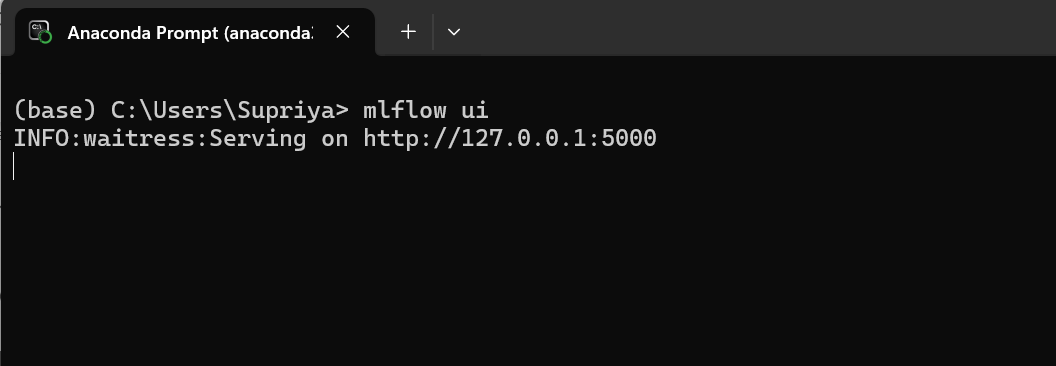

In [ ]:
#localhost:5000

##### **Step 11: Import Libraries and Set Up MLflow**  

Before we begin logging our model in MLflow, we need to **import the required libraries** and **set up MLflow tracking**.


**Import Required Libraries**

🔽 Run the following command:  

In [ ]:
# Block 1 - Imports and Setup
import mlflow
import mlflow.sklearn
from pycaret.regression import *
from pycaret.datasets import get_data
import pandas as pd
import os

mlflow.set_tracking_uri("http://localhost:5000")

##### **Step 12: Load and Prepare Data**  

In this step, we will **load the dataset** and ensure there are **no missing values** in numerical columns.  

**🔹 Load the Dataset**  
🔽 Run the following command:  

In [ ]:
# Block 2 - Load Data
data = get_data('diamond')

numerical_cols = data.select_dtypes(include='number').columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


##### **Step 13: Train and Log the Model**  

This code trains a machine learning model using **PyCaret**, selects the best model, and logs key details in **MLflow**, including model type, residuals, and feature importance. The final model is saved locally and in MLflow for future use.  

**🔽 Run the following command:**  


In [ ]:
# Block 3 - Training Code
s = setup(data=data,
         target='Price',
         transform_target=True,
         log_experiment=False)

experiment_name = "diamond_price_prediction"
experiment = mlflow.get_experiment_by_name(experiment_name)
if experiment is None:
    experiment_id = mlflow.create_experiment(experiment_name)
else:
    experiment_id = experiment.experiment_id

model_dir = "./saved_models"
os.makedirs(model_dir, exist_ok=True)

with mlflow.start_run(experiment_id=experiment_id) as run:
    best_model = compare_models()

    mlflow.log_param("model_type", type(best_model).__name__)

    residuals_plot = plot_model(best_model, plot='residuals', save=True)
    feature_plot = plot_model(best_model, plot='feature', save=True)

    if os.path.exists('Residuals.png'):
        mlflow.log_artifact('Residuals.png')
    if os.path.exists('Feature Importance.png'):
        mlflow.log_artifact('Feature Importance.png')

    final_model = finalize_model(best_model)
    model_path = os.path.join(model_dir, 'diamond-pipeline')
    save_model(final_model, model_path)

    mlflow.sklearn.log_model(final_model, "model")

    run_id = run.info.run_id
    print(f"Model training completed. Run ID: {run_id}")

,Description,Value
0,Session id,153
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Numeric features,1
8,Categorical features,6
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,639.0198,1721784.9823,1299.2655,0.9838,0.0666,0.0487,0.2970
et,Extra Trees Regressor,740.7026,2092976.7897,1432.3859,0.9802,0.0795,0.0582,0.6410
rf,Random Forest Regressor,740.2282,2227190.8923,1473.2641,0.9790,0.0787,0.0574,0.5210
gbr,Gradient Boosting Regressor,772.8280,2483498.2497,1553.6989,0.9769,0.0774,0.0575,0.2640
dt,Decision Tree Regressor,958.3996,3690202.5922,1883.1386,0.9652,0.1050,0.0751,0.1050
ada,AdaBoost Regressor,2050.8192,17564108.4789,4153.4413,0.8362,0.1925,0.1543,0.2750
knn,K Neighbors Regressor,3087.2386,36049669.6852,5993.7505,0.6570,0.3619,0.2331,0.1240
omp,Orthogonal Matching Pursuit,3363.8772,83781881.9295,8966.9289,0.1922,0.2806,0.2208,0.1260
lasso,Lasso Regression,6692.6556,119415392.2281,10901.3672,-0.1284,0.7177,0.5680,0.1080
en,Elastic Net,6692.6556,119415392.2281,10901.3672,-0.1284,0.7177,0.5680,0.1180


Transformation Pipeline and Model Successfully Saved


2025/02/08 14:59:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model training completed. Run ID: 832cbf49d03f465aa10e5d20de20c759
🏃 View run intrigued-turtle-367 at: http://localhost:5000/#/experiments/151525864346649219/runs/832cbf49d03f465aa10e5d20de20c759
🧪 View experiment at: http://localhost:5000/#/experiments/151525864346649219


##### **Step 14: Make Predictions with the Trained Model**  

This function loads the trained model from the specified path, prepares the test data by removing the **Price** column, and generates predictions using **PyCaret's predict_model** function.  

**🔽 Run the following command:**  

In [ ]:
# Block 4 - Prediction Function
def predict_with_model(model_path=None):
    if model_path is None:
        model_path = os.path.join(model_dir, 'diamond-pipeline')

    loaded_model = load_model(model_path)

    data = get_data('diamond')
    test_data = data.copy()
    if 'Price' in test_data.columns:
        test_data.drop('Price', axis=1, inplace=True)

    predictions = predict_model(loaded_model, data=test_data)
    return predictions

##### **Step 15: Generate Sample Predictions**  

This code loads the trained model, makes predictions on the dataset, and displays a sample of the predicted values.  

**🔽 Run the following command:**  


In [ ]:
# Block 5 - Make Predictions
print("\nMaking predictions...")
predictions = predict_with_model()
print("\nSample predictions:")
print(predictions.head())


Making predictions...
Transformation Pipeline and Model Successfully Loaded


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171



Sample predictions:
   Carat Weight    Cut Color Clarity Polish Symmetry Report  prediction_label
0          1.10  Ideal     H     SI1     VG       EX    GIA       5421.280172
1          0.83  Ideal     H     VS1     ID       ID   AGSL       3569.891342
2          0.85  Ideal     H     SI1     EX       EX    GIA       3341.587732
3          0.91  Ideal     E     SI1     VG       VG    GIA       4531.185124
4          0.83  Ideal     G     SI1     EX       EX    GIA       3256.250454


##### **Step 16: View MLflow Runs**  

This code retrieves and displays all MLflow runs for the "diamond_price_prediction" experiment, showing details like run ID, status, and start time.  

**🔽 Run the following command:**  


In [ ]:
# Block 6 - View MLflow Runs
experiment = mlflow.get_experiment_by_name("diamond_price_prediction")
runs = mlflow.search_runs(experiment_ids=[experiment.experiment_id])
print("\nMLflow runs:")
print(runs[['run_id', 'status', 'start_time']])


MLflow runs:
                             run_id    status                       start_time
0  832cbf49d03f465aa10e5d20de20c759  FINISHED 2025-02-08 09:28:55.449000+00:00
1  d54635427f1e43d3842dfd1578990ee6  FINISHED 2025-02-08 09:18:05.629000+00:00


#### **ML FLOW INTERFACE**

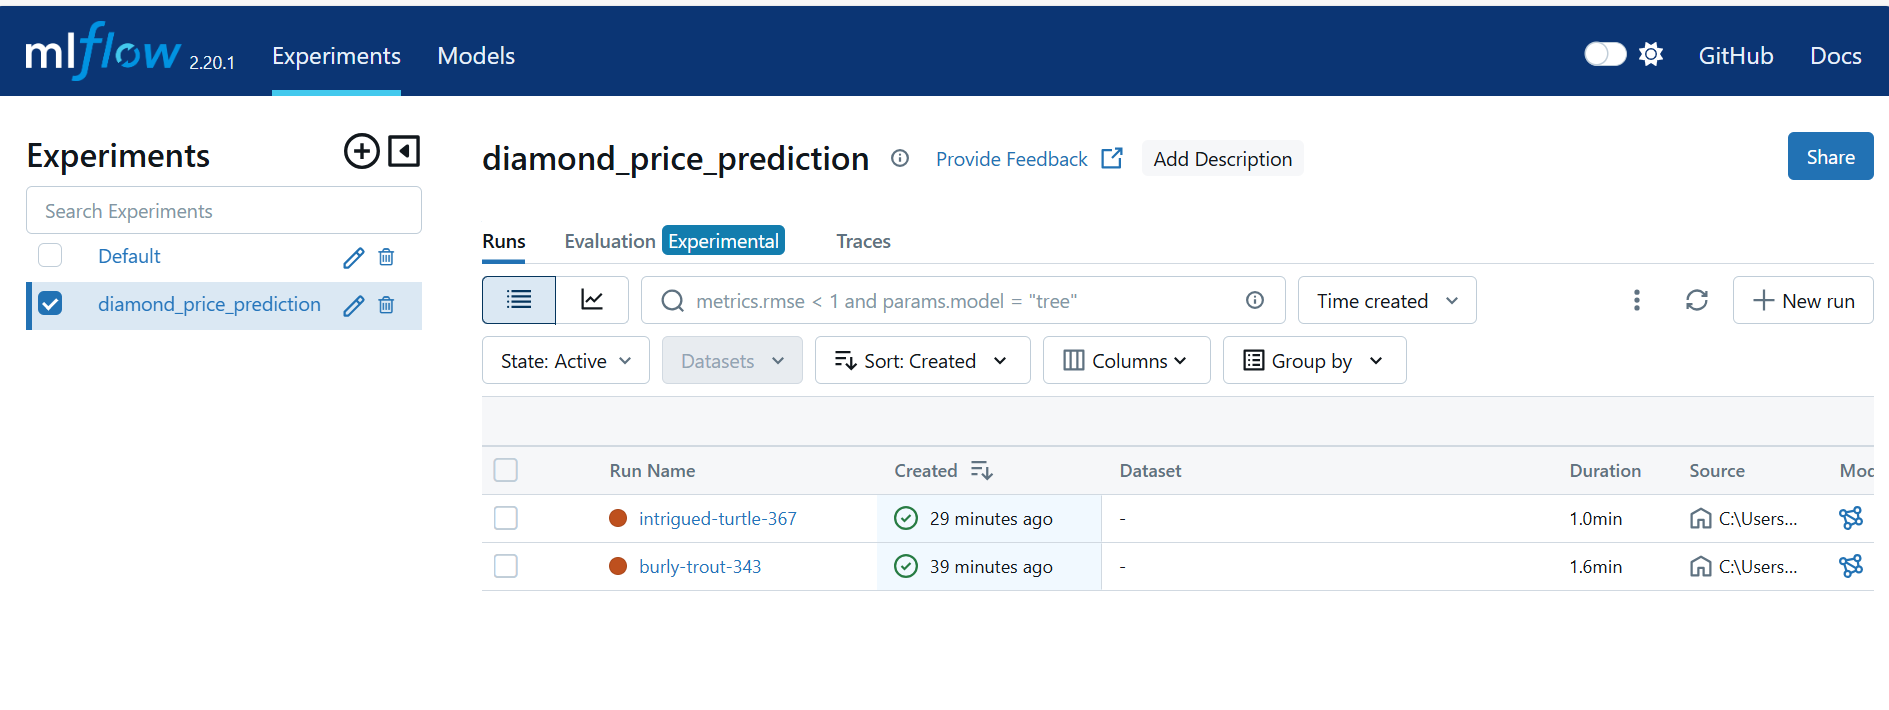